In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Nobel= pd.read_csv("nobel.csv")
Nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [3]:
Nobel.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [4]:
# What is the most commonly awarded gender and birth country?
top_gender =  Nobel['sex'].value_counts()
top_gender.index[0]
print("The gender with the most Nobel laureates is :", top_gender.index[0])

The gender with the most Nobel laureates is : Male


In [5]:
top_country =  Nobel['birth_country'].value_counts()
top_country.index[0]
print("The birth country with the most Nobel laureates is :", top_country.index[0])

The birth country with the most Nobel laureates is : United States of America


In [18]:
# To Calculate the proportion of USA born winners per decade first:

# Identify the decade with the highest ratio of US-born winners
Nobel['us_born_winners'] = Nobel['birth_country'] == 'United States of America'


Nobel['decade'] = (np.floor(Nobel['year'] / 10) * 10).astype(int)
# nobel['year'] / 10: converts year to a floating-point decade (e.g., 1971 → 197.1).
# np.floor(...): rounds down to the nearest whole decade (e.g., 197.1 → 197.0).
# * 10: brings it back to the decade format (e.g., 197.0 → 1970.0).
# .astype(int): converts it to integer type (e.g., 1970.0 → 1970).


prop_usa_winners = Nobel.groupby('decade', as_index=False)['us_born_winners'].mean()
# as_index=False means the decade will remain as a column in the resulting DataFrame (not become the index).

prop_usa_winners.head()

,decade,us_born_winners
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326


In [7]:
# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['us_born_winners'] == prop_usa_winners['us_born_winners'].max()]['decade'].values[0]
max_decade_usa

# ['decade']-Now that we have the filtered row(s), we select the 'decade' column.
# .values = .values turns the selected column into a NumPy array.
# [0] grabs the first (and likely only) value — the decade with the highest US-born winner proportion. a plain integer, not a Series, not an array — just the number.

2000

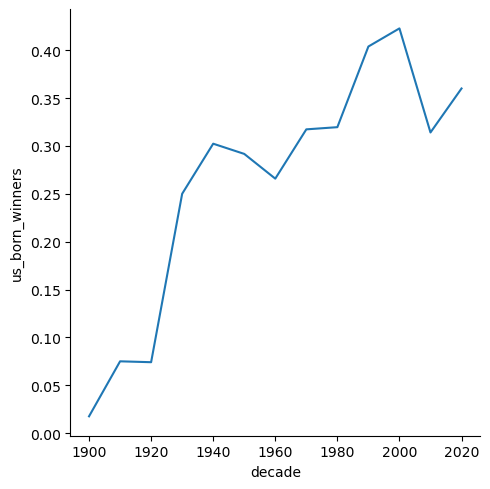

In [19]:
# Optional: Plotting USA born winners
ax1 = sns.relplot(x='decade', y='us_born_winners', data=prop_usa_winners, kind="line")
plt.show()

In [20]:
# Calculating the proportion of female laureates per decade
Nobel['female_winner'] = Nobel['sex'] == 'Female'

prop_female_winners = Nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
# as_index=False means the group labels stay as regular columns, not as index values in the result

prop_female_winners.head()

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923


In [10]:
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] ==\
prop_female_winners['female_winner'].max()][['decade', 'category']]

max_female_decade_category

,decade,category
68,2020,Literature


In [11]:
# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
max_female_dict

{2020: 'Literature'}

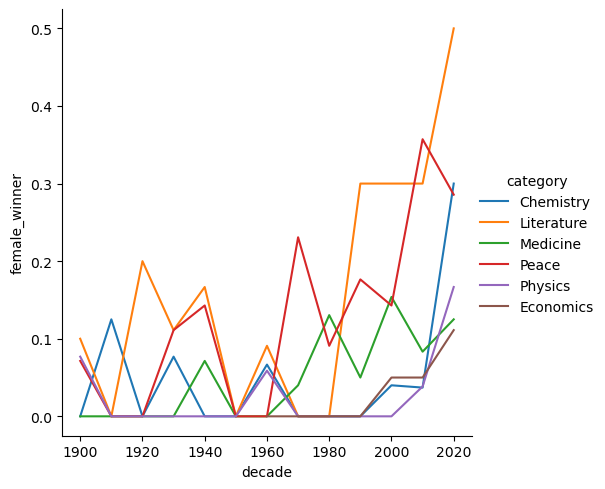

In [12]:
# Optional: Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")
plt.show()

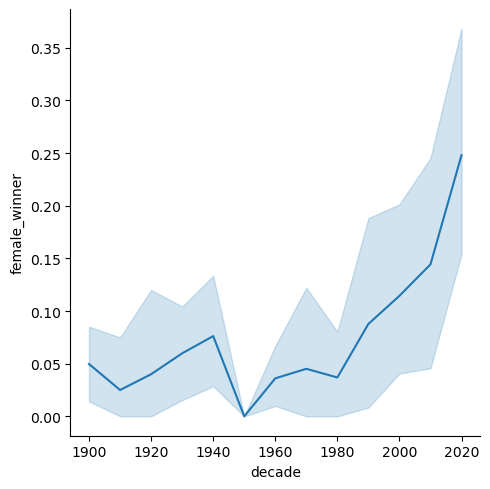

In [13]:
# Optional: Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winner', data=prop_female_winners, kind="line")
plt.show()

In [21]:
# Finding the first woman to win a Nobel Prize
nobel_women = Nobel[Nobel['female_winner']]
nobel_women.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,us_born_winners,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,...,Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,False,1900,True
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,...,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",...,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,False,1920,True


In [15]:
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [16]:
counts = Nobel['full_name'].value_counts()
counts

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Karl Ziegler                                                                         1
Giulio Natta                                                                         1
Giorgos Seferis                                                                      1
Sir John Carew Eccles                                                                1
Claudia Goldin                                                                       1
Name: count, Length: 993, dtype: 

In [23]:
repeats = counts[counts >= 2].index
repeats

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype='object', name='full_name')

In [24]:
# Selecting the laureates that have received 2 or more prizes
counts = Nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
